# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
import pandas as pd
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


**Variables to dummify**: species, island, sex

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [27]:
#Prepare Data
#Create squared bill length column
penguins["bill_length_square"] = penguins['bill_length_mm']**2

#Create cubed bill length column
penguins["bill_length_cubed"] = penguins['bill_length_mm']**3

#Create degree 10 bill length column
penguins["bill_length_ten"] = penguins['bill_length_mm']**10

X = penguins["bill_length_mm"].values.reshape(-1,1)
y = penguins["bill_depth_mm"].values

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,bill_length_square,bill_length_cubed,bill_length_ten,simple_linear_reg,quadratic_reg,cubic_reg,degree_ten_reg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1528.81,59776.471,8.351559e+15,17.567673,17.542639,17.509238,17.229772
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1560.25,61629.875,9.246363e+15,17.534742,17.515421,17.487461,17.228358
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1624.09,65450.827,1.129927e+16,17.468881,17.460154,17.442564,17.225114
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1346.89,49430.863,4.432621e+15,17.765257,17.700131,17.630800,17.235965
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1544.49,60698.457,8.788717e+15,17.551207,17.529065,17.498405,17.229081


In [28]:
#Create models
from sklearn.model_selection import train_test_split

#Simple linear regression (straight-line) model
lr = LinearRegression()

#Fit model
lr_fit = lr.fit(X, y)

#Predictions
y_prediction_lr = lr_fit.predict(X)

#Add predictions to original dataframe to be plotted
penguins["simple_linear_reg"] = y_prediction_lr

In [33]:
#Quadratic (degree 2 polynomial) model
X = penguins["bill_length_square"].values.reshape(-1,1)

#Fit model
qr_fit = lr.fit(X, y)

#prediction
y_prediction_qr = qr_fit.predict(X)

#Add predictions to original dataframe to be plotted
penguins["quadratic_reg"] = y_prediction_qr

In [34]:
#Cubic (degree 3 polynomial) model
X = penguins["bill_length_cubed"].values.reshape(-1,1)

#Fit model
cm_fit = lr.fit(X, y)

#prediction
y_prediction_cm = cm_fit.predict(X)

#Add prediction to original dataframe to be plotted
penguins["cubic_reg"] = y_prediction_cm

In [35]:
#Degree 10 polynomial model
X = penguins["bill_length_ten"].values.reshape(-1,1)

#Fit model
tenm_fit = lr.fit(X, y)

#prediction
y_prediction_tenm = tenm_fit.predict(X)

#Add prediction to original dataframe to be plotted
penguins["degree_ten_reg"] = y_prediction_tenm

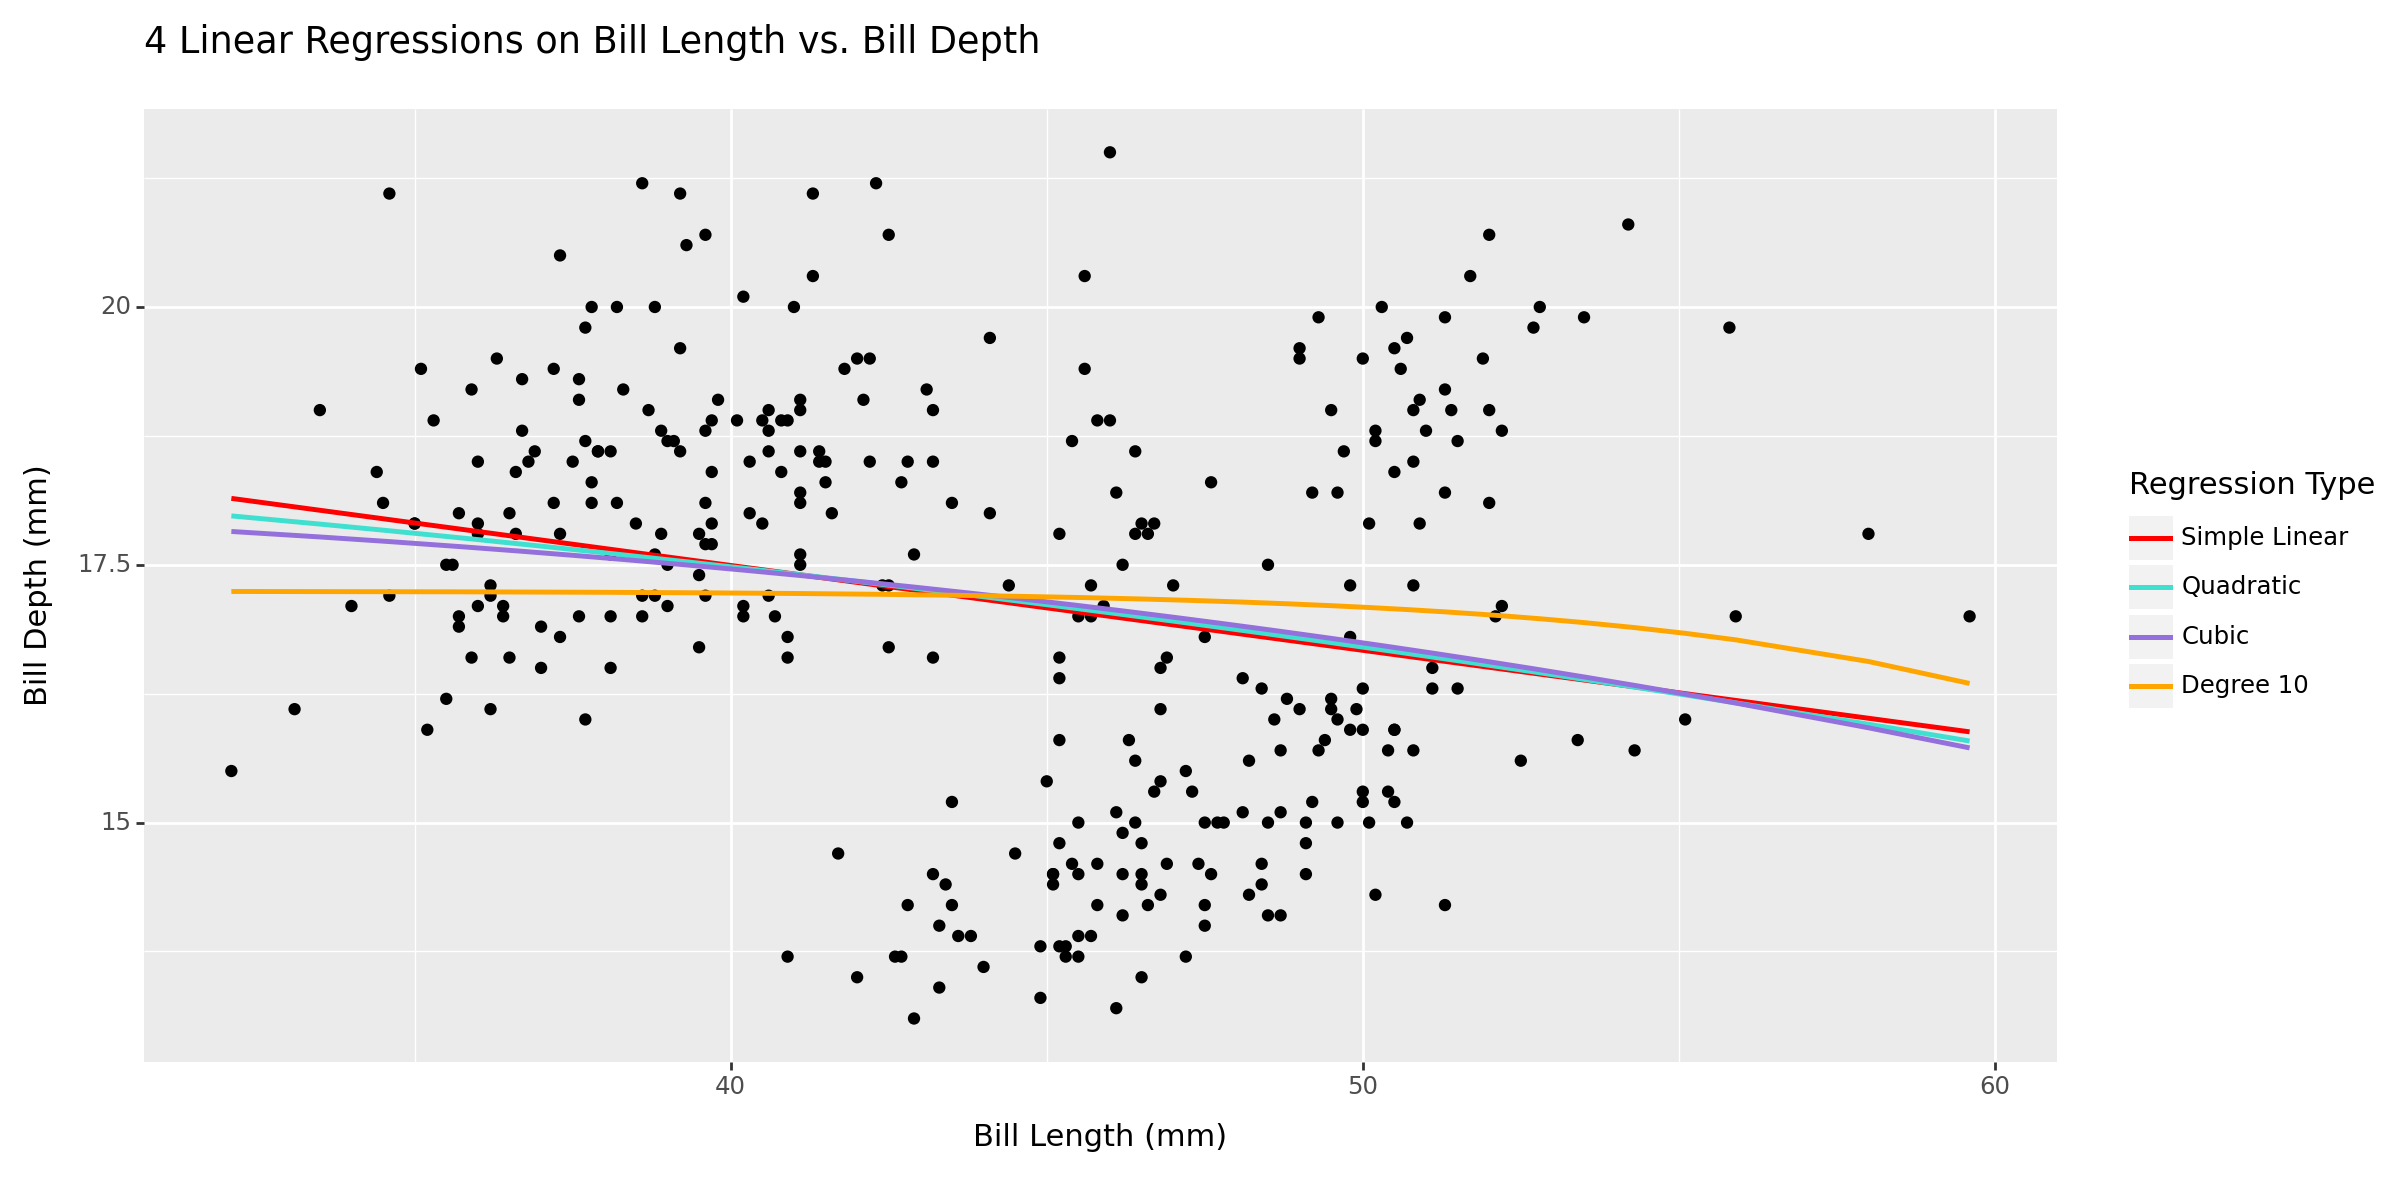

In [36]:
#Create Scatterplot
models_plot = (
    ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm'))
    + geom_point()
    + geom_line(aes(y='simple_linear_reg', color='"Simple Linear"'), size=1)
    + geom_line(aes(y='quadratic_reg', color='"Quadratic"'), size=1)
    + geom_line(aes(y='cubic_reg', color='"Cubic"'), size=1)
    + geom_line(aes(y='degree_ten_reg', color='"Degree 10"'), size=1)
    + scale_color_manual(values={
        'Simple Linear': 'red',
        'Quadratic': 'turquoise',
        'Cubic': 'mediumpurple',
        'Degree 10': 'orange'})
    + labs(title='4 Linear Regressions on Bill Length vs. Bill Depth',
         x='Bill Length (mm)', y='Bill Depth (mm)', color='Regression Type')
    + theme(legend_position='right', figure_size=(12, 6))
)

print(models_plot)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

It appears that none of these models fit the data very well. Visually, it appears there is a more negative correlation in the data than what the models show. The simple linear, quadratic, and cubic models are all very similar, but the quadratic and cubic appear to be the most precise. Simple linear seems to underfit the data. Additionally, the degree 10 polynomial is very similar, despite displaying a slight downward curve at the higher bill length values. This is likely due to overfitting, and therefore this is not a good model. In conclusion, I would say cubic is the best model due to its slight curve, and appearance of splitting the data points through the middle.